In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load Dataset"
data = pd.read_csv("/content/drive/MyDrive/Rainfall_Data_Updated.csv")
data.head()


SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG  ...    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  ...  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  ...  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  ...  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  ...  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  ...  260.7   25.4  344.7  2566.7      1.3    309.7   

   June-September  Oct-Dec  Latitude  Longitude  
0          1696.3    980.3  12.61124   92.83165  
1          2185.9    716.7  12.61124   92.83165  
2          1874.0    690.6  12.61124   92.83165  
3          1977.6    571.0  12.61124   92.83165  
4          1624.9    630.8  12.61124   92.83165  

[5 rows x 21 columns]

In [ ]:
rainfall_df = pd.read_csv("/content/drive/MyDrive/Rainfall_Data_Updated.csv")
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBDIVISION     4187 non-null   object 
 1   YEAR            4187 non-null   int64  
 2   JAN             4187 non-null   float64
 3   FEB             4187 non-null   float64
 4   MAR             4187 non-null   float64
 5   APR             4187 non-null   float64
 6   MAY             4187 non-null   float64
 7   JUN             4187 non-null   float64
 8   JUL             4187 non-null   float64
 9   AUG             4187 non-null   float64
 10  SEP             4187 non-null   float64
 11  OCT             4187 non-null   float64
 12  NOV             4187 non-null   float64
 13  DEC             4187 non-null   float64
 14  ANNUAL          4187 non-null   float64
 15  Jan-Feb         4187 non-null   float64
 16  Mar-May         4187 non-null   float64
 17  June-September  4187 non-null   f

In [ ]:
print("Dataset Shape (Rows, Columns):", rainfall_df.shape)

Dataset Shape (Rows, Columns): (4187, 21)


In [ ]:
rainfall_df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'June-September', 'Oct-Dec', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# unique values of the (target variable)
rainfall_df.ANNUAL.unique()

array([3373.2, 3520.7, 2957.4, ..., 1395. , 1642.9, 1065.7])

In [ ]:
#the unique value
rainfall_df.nunique()

SUBDIVISION         36
YEAR               117
JAN                809
FEB                903
MAR                989
APR               1248
MAY               1751
JUN               2754
JUL               3094
AUG               2950
SEP               2664
OCT               1958
NOV               1246
DEC                810
ANNUAL            3803
Jan-Feb           1237
Mar-May           2307
June-September    3739
Oct-Dec           2426
Latitude            36
Longitude           36
dtype: int64

In [ ]:
#counting  number of duplicated values
rainfall_df.duplicated().sum()

0

In [ ]:
#Checking the null value count
rainfall_df.isnull().sum()

SUBDIVISION       0
YEAR              0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUAL            0
Jan-Feb           0
Mar-May           0
June-September    0
Oct-Dec           0
Latitude          0
Longitude         0
dtype: int64

In [ ]:
rainfall_df.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4187.000000  4187.000000  4187.000000  4187.000000  4187.000000   
mean   1959.206831    18.937772    21.604374    27.395503    43.081712   
std      33.709294    33.780997    35.721764    46.886429    68.123572   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.500000     1.000000     3.000000   
50%    1959.000000     6.000000     6.500000     7.900000    15.500000   
75%    1988.000000    22.000000    26.600000    31.300000    49.550000   
max    2017.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4187.000000  4187.000000  4187.000000  4187.000000  4187.000000   
mean     85.646511   230.047704   347.063780   289.762156   197.311863   
std     122.662312   234.136680   268.643091   188.354112   135.466361   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.650000    70.850000   176.050000   155.950000   100.400000   
50%      36.900000   138.900000   285.300000   258.900000   173.900000   
75%      97.500000   303.850000   418.400000   377.550000   265.850000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL      Jan-Feb  \
count  4187.000000  4187.000000  4187.000000  4187.000000  4187.000000   
mean     95.314713    39.490685    18.934858  1414.591631    40.542146   
std      99.121632    68.275998    42.952083   905.706627    59.271964   
min       0.000000     0.000000     0.000000    62.200000     0.000000   
25%      14.600000     0.600000     0.100000   804.950000     4.000000   
50%      65.700000     9.400000     3.100000  1123.300000    19.000000   
75%     148.100000    45.000000    17.650000  1650.300000    50.200000   
max     948.300000   648.900000   617.500000  6331.100000   699.500000   

           Mar-May  June-September      Oct-Dec     Latitude    Longitude  
count  4187.000000     4187.000000  4187.000000  4187.000000  4187.000000  
mean    156.123726     1064.185504   153.740255    21.912044    79.909447  
std     201.297829      706.413643   166.854827     6.365097     6.235477  
min       0.000000       57.400000     0.000000    10.160618    70.568914  
25%      24.200000      574.150000    34.150000    17.538193    75.061520  
50%      75.100000      881.200000    98.300000    23.059981    78.026702  
75%     197.600000     1287.450000   211.550000    26.599363    82.868991  
max    1745.800000     4537.000000  1252.500000    33.557450    94.592130

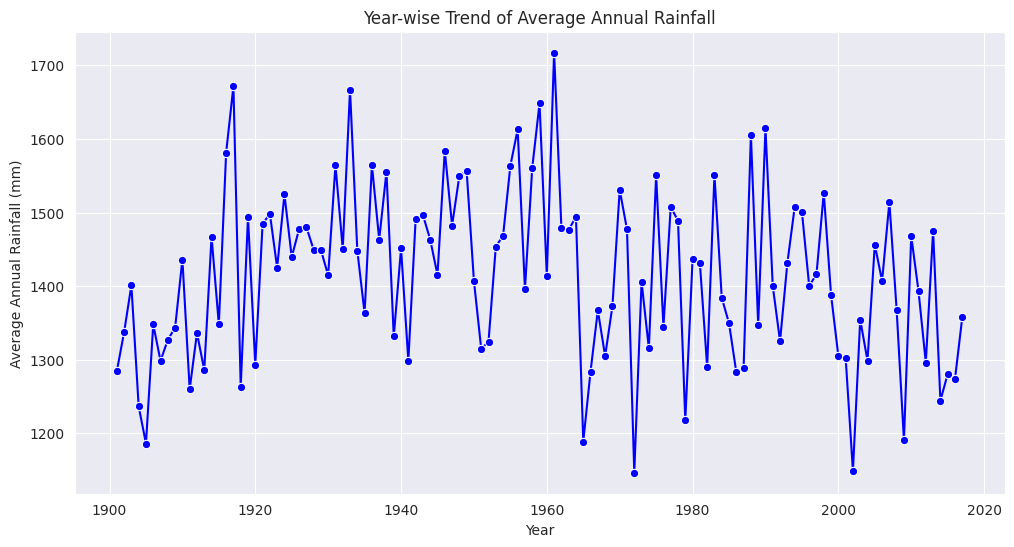

In [ ]:
# Set style
sns.set_style("darkgrid")

# Aggregate annual rainfall by year
yearly_rainfall = rainfall_df.groupby("YEAR")["ANNUAL"].mean()

# Plot yearly rainfall trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_rainfall.index, y=yearly_rainfall.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Average Annual Rainfall (mm)")
plt.title("Year-wise Trend of Average Annual Rainfall")
plt.show()

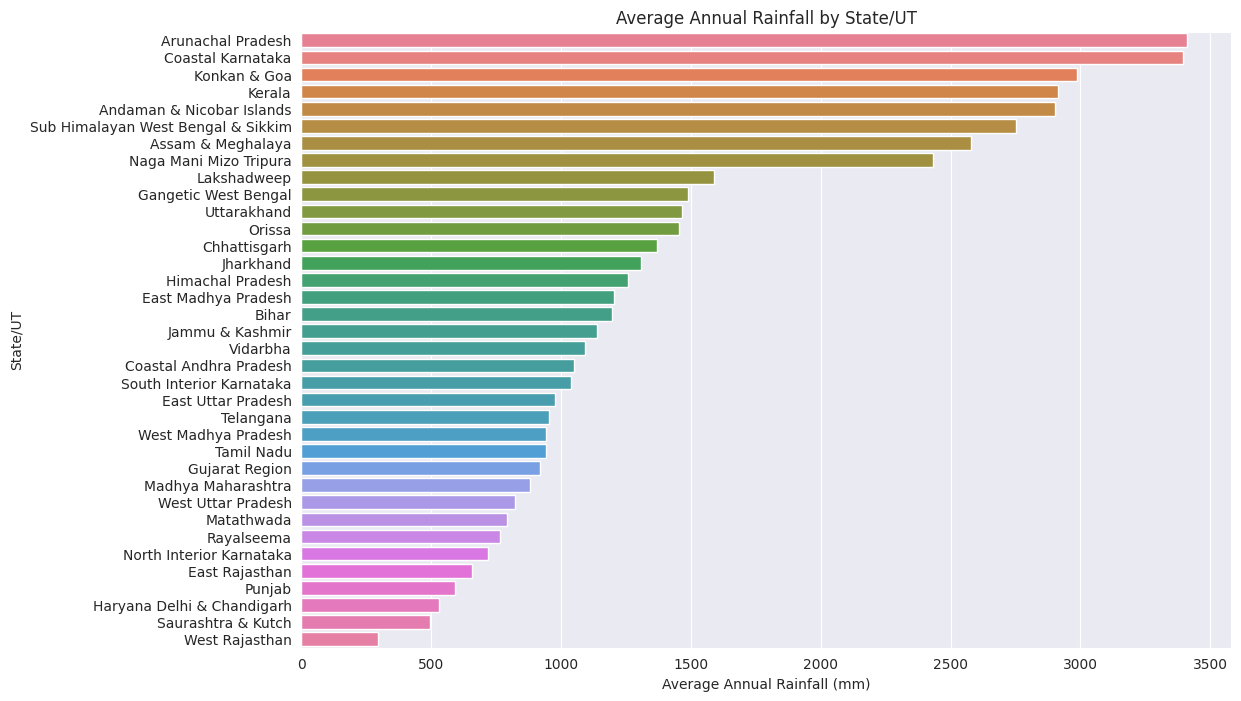

In [ ]:
# Aggregate and sort by average annual rainfall
statewise_rainfall = rainfall_df.groupby('SUBDIVISION')['ANNUAL'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ANNUAL', y='SUBDIVISION', data=statewise_rainfall, hue='SUBDIVISION', palette='husl', legend=False)
plt.title('Average Annual Rainfall by State/UT')
plt.xlabel('Average Annual Rainfall (mm)')
plt.ylabel('State/UT')
plt.show()


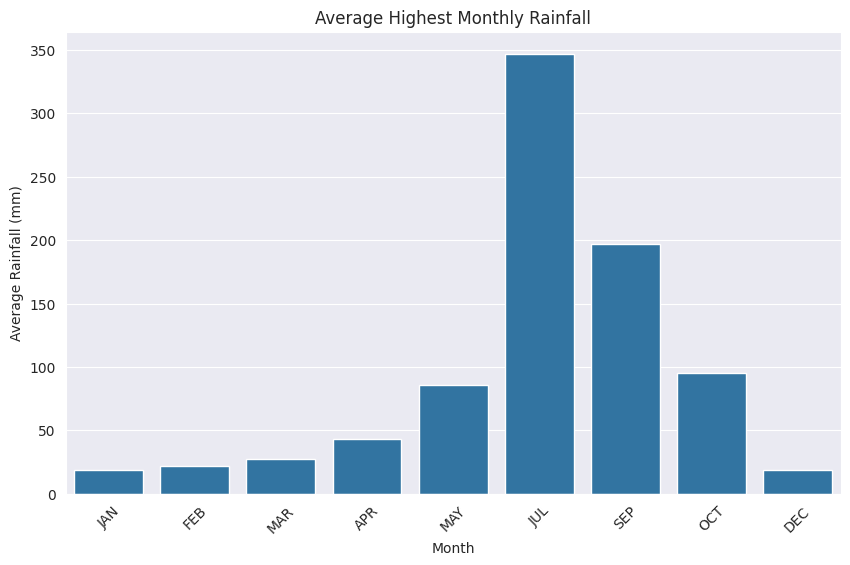

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY','JUL','SEP','OCT', 'DEC']
monthly_avg = rainfall_df[months].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=monthly_avg)
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Highest Monthly Rainfall')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The month with the lowest average rainfall is DEC with an average of 18.93 mm.


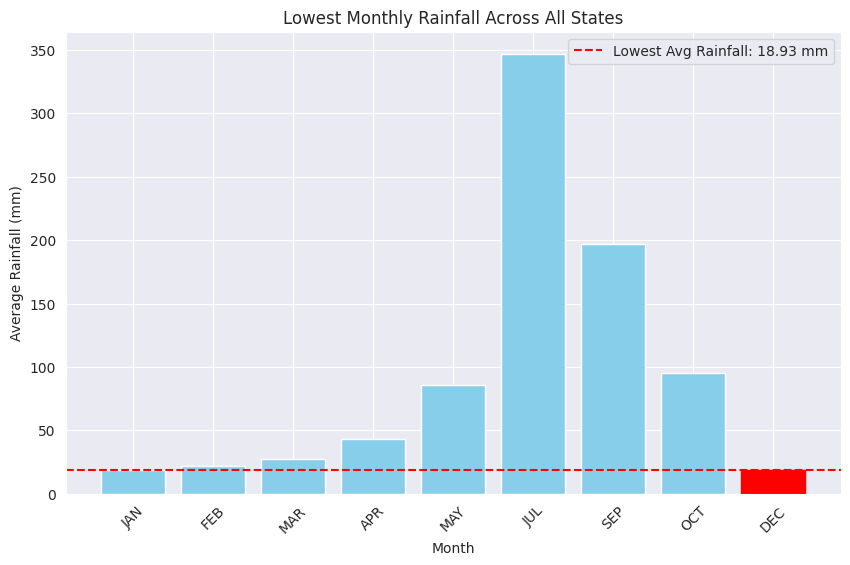

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY','JUL','SEP','OCT', 'DEC']

monthly_avg_rainfall = rainfall_df[monthly_columns].mean()

month_with_lowest_rainfall = monthly_avg_rainfall.idxmin()
lowest_rainfall_value = monthly_avg_rainfall.min()

print(f"The month with the lowest average rainfall is {month_with_lowest_rainfall} with an average of {lowest_rainfall_value:.2f} mm.")
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_avg_rainfall.index, monthly_avg_rainfall, color='skyblue')

bars[monthly_avg_rainfall.index.get_loc(month_with_lowest_rainfall)].set_color('red')

plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Lowest Monthly Rainfall Across All States')
plt.xticks(rotation=45)
plt.axhline(y=lowest_rainfall_value, color='r', linestyle='--', label=f'Lowest Avg Rainfall: {lowest_rainfall_value:.2f} mm')
plt.legend()

plt.show()

                  SUBDIVISION  Total_Rainfall
0              West Rajasthan      294.115385
1          Saurashtra & Kutch      496.380342
2  Haryana Delhi & Chandigarh      528.434188
3                      Punjab      591.441880
4              East Rajasthan      656.496581
5    North Interior Karnataka      717.187179
6                  Rayalseema      764.988034
7                  Matathwada      791.731624
8          West Uttar Pradesh      823.897436
9          Madhya Maharashtra      881.420513


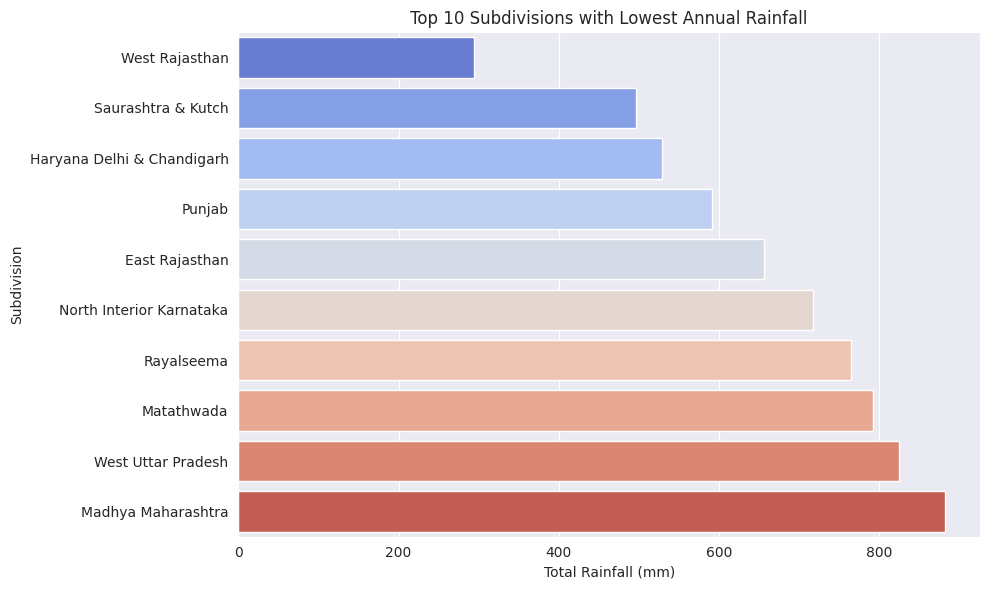

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use ANNUAL column instead of manually summing months
rainfall_df['Total_Rainfall'] = rainfall_df['ANNUAL']

# Find lowest rainfall subdivisions
lowest_rainfall_subdivisions = rainfall_df[['SUBDIVISION', 'Total_Rainfall']].groupby('SUBDIVISION').mean().sort_values(by='Total_Rainfall', ascending=True)
top_lowest_rainfall_subdivisions = lowest_rainfall_subdivisions.head(10).reset_index()

print(top_lowest_rainfall_subdivisions)

# Plot lowest rainfall subdivisions
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Rainfall', y='SUBDIVISION', data=top_lowest_rainfall_subdivisions, hue='SUBDIVISION', palette='coolwarm', legend=False)
plt.title('Top 10 Subdivisions with Lowest Annual Rainfall')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Subdivision')
plt.tight_layout()
plt.show()




                          SUBDIVISION  Total_Rainfall
0                   Arunachal Pradesh     3410.772981
1                   Coastal Karnataka     3395.425109
2                        Konkan & Goa     2987.523077
3                              Kerala     2914.256410
4           Andaman & Nicobar Islands     2901.704457
5  Sub Himalayan West Bengal & Sikkim     2750.538462
6                   Assam & Meghalaya     2579.133333
7              Naga Mani Mizo Tripura     2432.735897
8                         Lakshadweep     1588.466102
9                Gangetic West Bengal     1490.619658


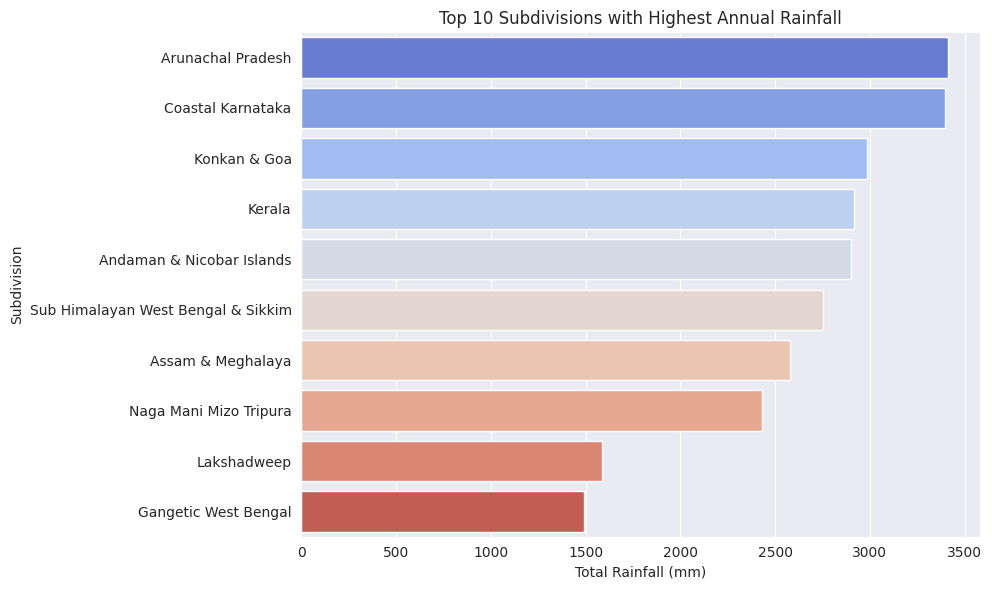

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use ANNUAL column instead of manually summing months
rainfall_df['Total_Rainfall'] = rainfall_df['ANNUAL']

# Find highest rainfall subdivisions
highest_rainfall_subdivisions = (
    rainfall_df[['SUBDIVISION', 'Total_Rainfall']]
    .groupby('SUBDIVISION')
    .mean()
    .sort_values(by='Total_Rainfall', ascending=False)  # Descending order for highest rainfall
)

top_highest_rainfall_subdivisions = highest_rainfall_subdivisions.head(10).reset_index()

print(top_highest_rainfall_subdivisions)

# Plot highest rainfall subdivisions
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Rainfall',
    y='SUBDIVISION',
    data=top_highest_rainfall_subdivisions,
    hue='SUBDIVISION',
    palette='coolwarm',
    legend=False
)
plt.title('Top 10 Subdivisions with Highest Annual Rainfall')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Subdivision')
plt.tight_layout()
plt.show()


                          SUBDIVISION  Total_Rainfall
0                   Arunachal Pradesh     3410.772981
1                   Coastal Karnataka     3395.425109
2                        Konkan & Goa     2987.523077
3                              Kerala     2914.256410
4           Andaman & Nicobar Islands     2901.704457
5  Sub Himalayan West Bengal & Sikkim     2750.538462
6                   Assam & Meghalaya     2579.133333
7              Naga Mani Mizo Tripura     2432.735897
8                         Lakshadweep     1588.466102
9                Gangetic West Bengal     1490.619658


<ipython-input-22-faf66002ccc2>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


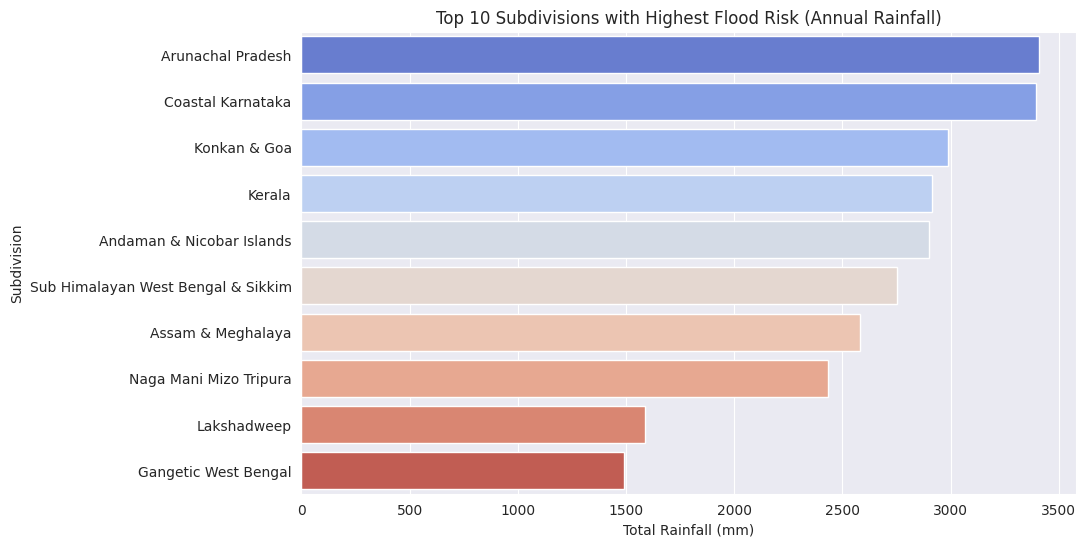

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the ANNUAL column directly for total rainfall
rainfall_df['Total_Rainfall'] = rainfall_df['ANNUAL']

# Get top 10 flood-risk subdivisions (sorted by annual rainfall)
top_flood_risk_subdivisions = (
    rainfall_df[['SUBDIVISION', 'Total_Rainfall']]
    .groupby('SUBDIVISION')
    .mean()  # If multiple years are present, take the average
    .sort_values(by='Total_Rainfall', ascending=False)
    .head(10)
    .reset_index()
)

print(top_flood_risk_subdivisions)

# Generate a color palette based on index positions
num_subdivisions = len(top_flood_risk_subdivisions)
custom_palette = sns.color_palette("coolwarm", num_subdivisions)  # Colors assigned by index order

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Rainfall',
    y='SUBDIVISION',
    data=top_flood_risk_subdivisions,
    palette=custom_palette  # Index-based color assignment
)
plt.title('Top 10 Subdivisions with Highest Flood Risk (Annual Rainfall)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Subdivision')

# Show plot
plt.show()


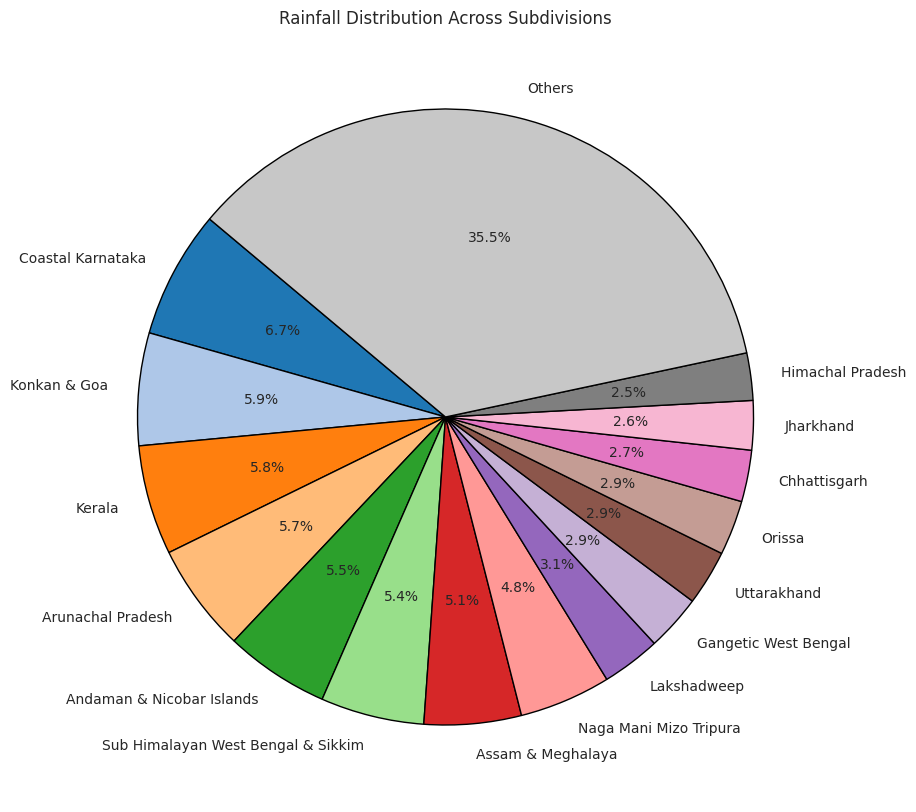

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group total annual rainfall by subdivision
rainfall_distribution = rainfall_df.groupby('SUBDIVISION')['ANNUAL'].sum().sort_values(ascending=False)

# Aggregate smaller subdivisions into "Others" if too many exist
top_n = 15  # Display only the top N subdivisions
if len(rainfall_distribution) > top_n:
    top_rainfall = rainfall_distribution.iloc[:top_n]  # Top N subdivisions
    other_rainfall = pd.Series(rainfall_distribution.iloc[top_n:].sum(), index=['Others'])  # Sum of remaining
    rainfall_distribution = pd.concat([top_rainfall, other_rainfall])  # Use concat instead of append

# Define colors
colors = sns.color_palette('tab20', len(rainfall_distribution))

# Plot Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(
    rainfall_distribution, labels=rainfall_distribution.index, autopct='%1.1f%%',
    startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'}
)
plt.title('Rainfall Distribution Across Subdivisions')
plt.show()


In [ ]:
import pandas as pd
numerical_columns = ['JAN', 'MAR', 'APR', 'MAY', 'JUL', 'SEP', 'OCT', 'ANNUAL']

def remove_outliers_iqr(df, column):
    """Removes outliers using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
for column in numerical_columns:
    if column in rainfall_df.columns:  # Ensure column exists
        rainfall_df = remove_outliers_iqr(rainfall_df, column)

# Display dataset info
print("\nOutliers removed. Cleaned dataset info:")
print(rainfall_df.info())

# Save cleaned dataset
rainfall_df.to_csv("cleaned_rainfall_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_rainfall_data.csv'")



Outliers removed. Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 2519 entries, 40 to 4184
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBDIVISION     2519 non-null   object 
 1   YEAR            2519 non-null   int64  
 2   JAN             2519 non-null   float64
 3   FEB             2519 non-null   float64
 4   MAR             2519 non-null   float64
 5   APR             2519 non-null   float64
 6   MAY             2519 non-null   float64
 7   JUN             2519 non-null   float64
 8   JUL             2519 non-null   float64
 9   AUG             2519 non-null   float64
 10  SEP             2519 non-null   float64
 11  OCT             2519 non-null   float64
 12  NOV             2519 non-null   float64
 13  DEC             2519 non-null   float64
 14  ANNUAL          2519 non-null   float64
 15  Jan-Feb         2519 non-null   float64
 16  Mar-May         2519 non-null   float64
 

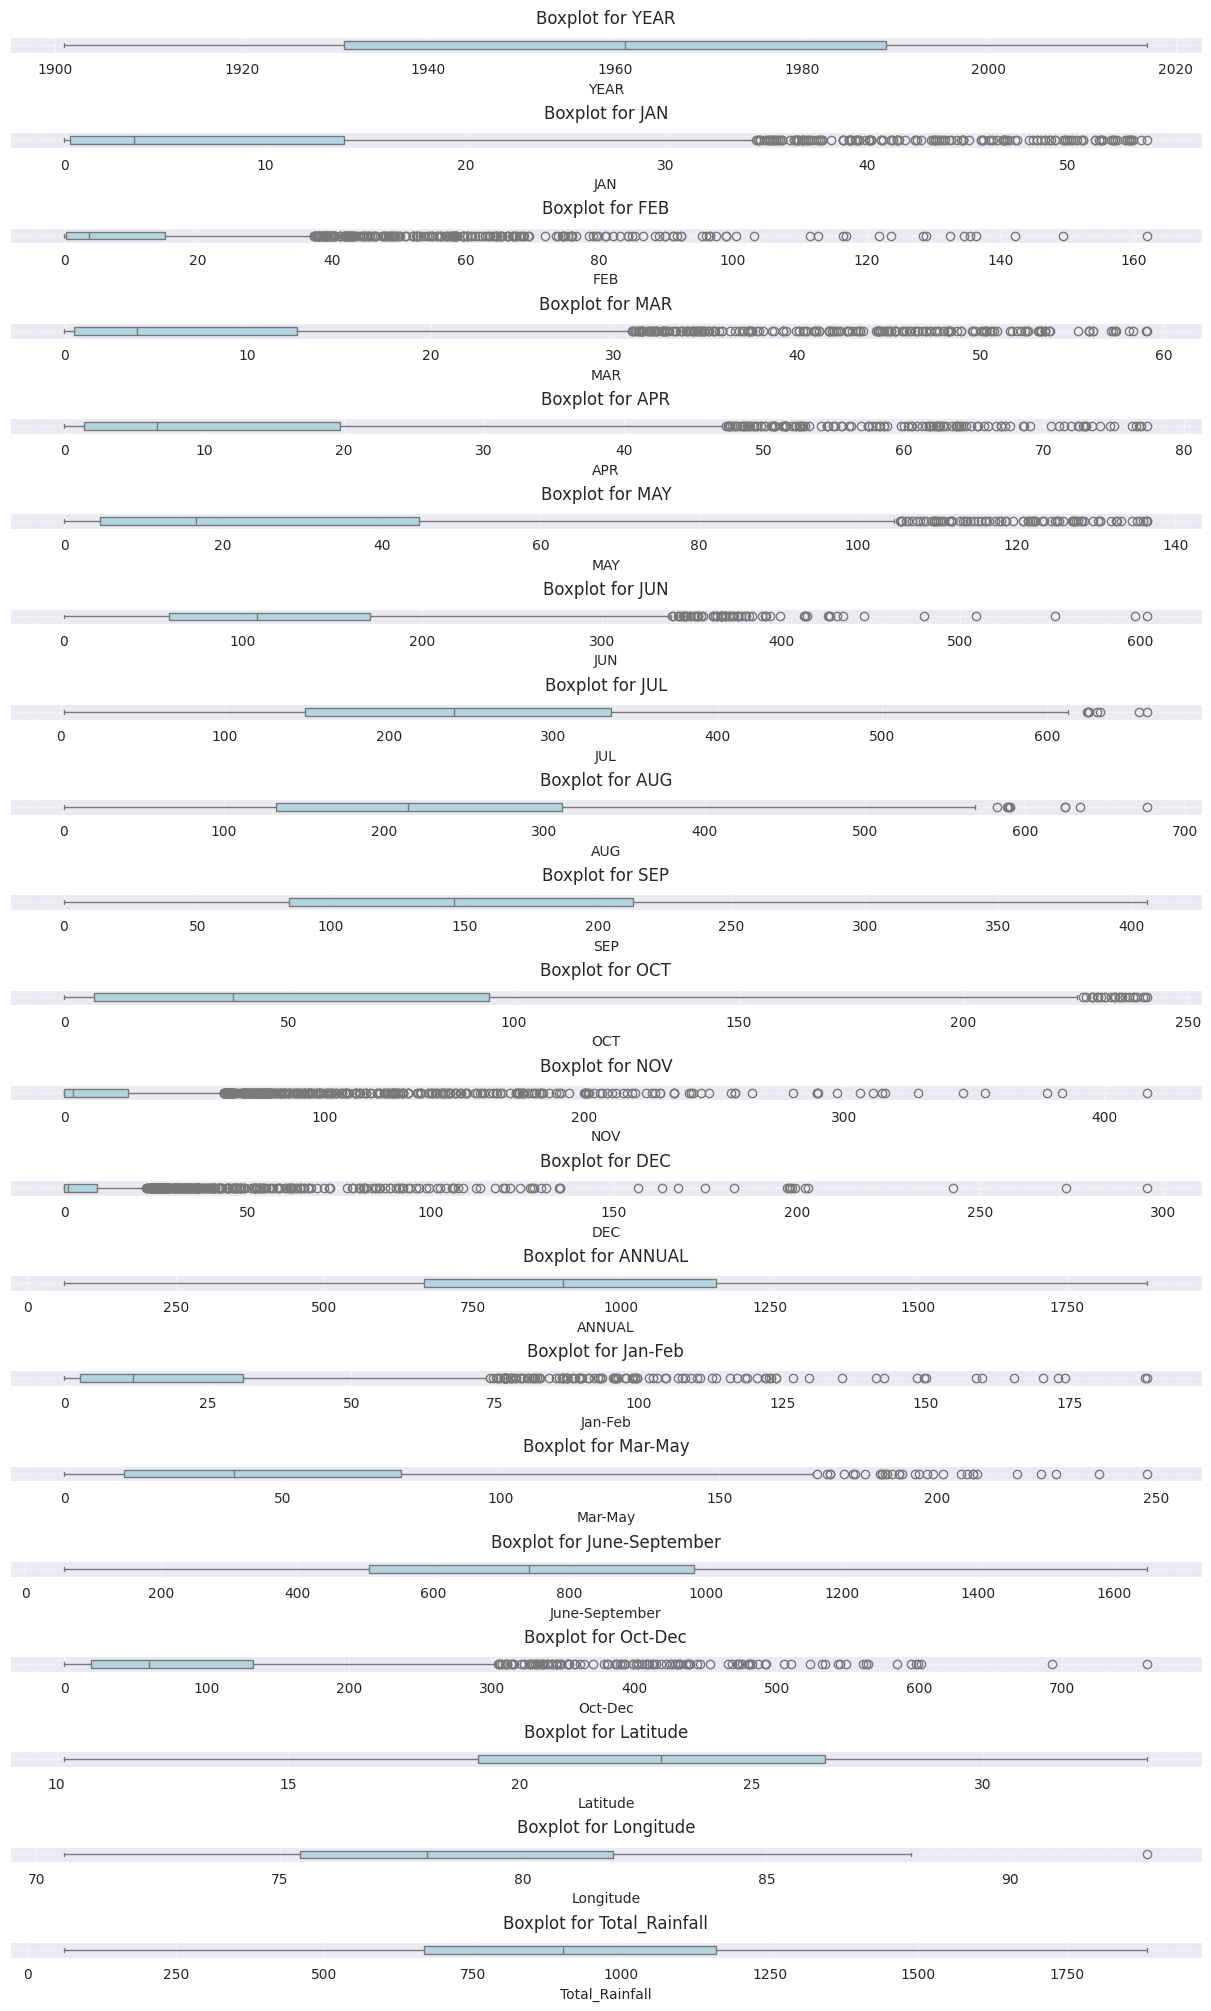

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "cleaned_rainfall_data.csv"
rainfall_df = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = rainfall_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

if not numerical_columns:
    print("No numerical columns found in the dataset.")
else:
    # Create subplots
    fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, 20), constrained_layout=True)

    # Ensure axes is iterable if only one column
    if len(numerical_columns) == 1:
        axes = [axes]  # Convert single axis to a list for iteration

    for ax, column in zip(axes, numerical_columns):
        sns.boxplot(x=rainfall_df[column], color="lightblue", ax=ax, width=0.5)
        ax.set_title(f"Boxplot for {column}", fontsize=12, pad=10)
        ax.set_xlabel(column, fontsize=10)
        ax.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()


In [ ]:
X = rainfall_df.drop(columns=['ANNUAL'])
y = rainfall_df['ANNUAL']

In [ ]:
X.fillna(0, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Shape of Features (X): (2519, 21)
Shape of Target (y): (2519,)
Training Features Shape: (1763, 21)
Testing Features Shape: (756, 21)


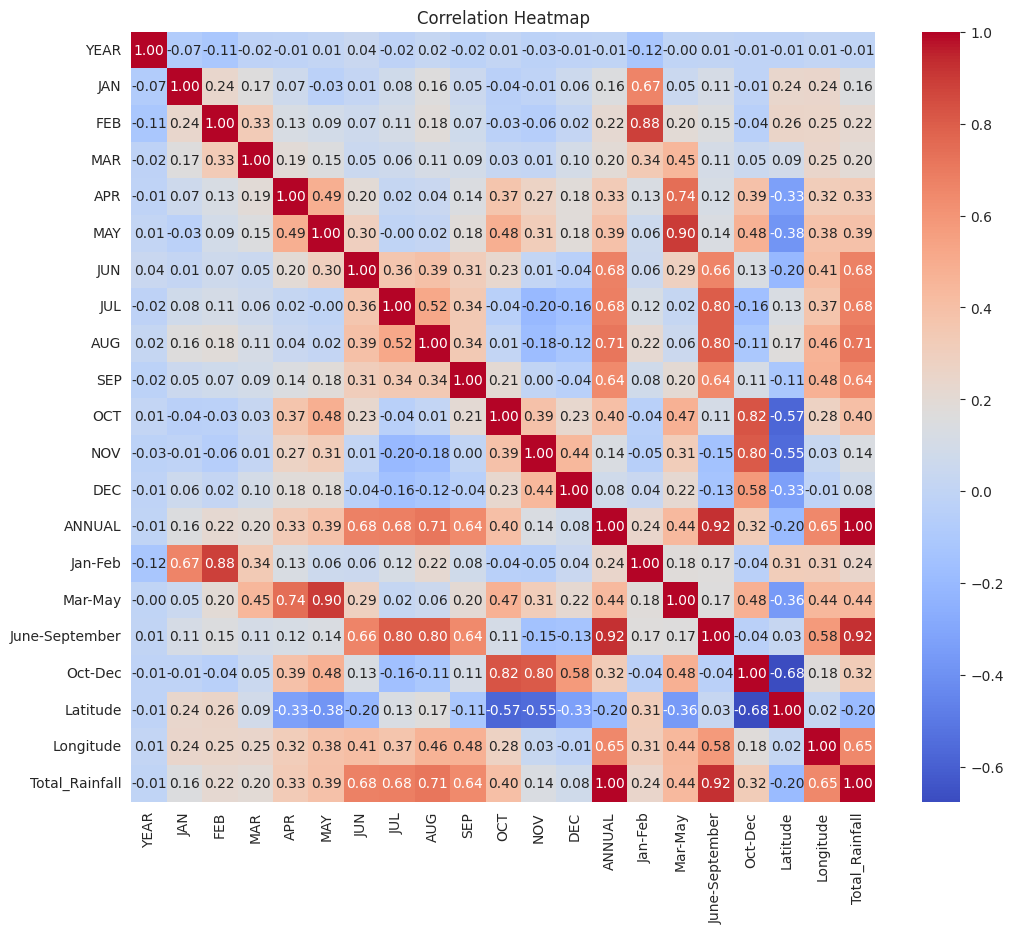

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = rainfall_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


📊 linear regression Model Performance:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: 1.0000


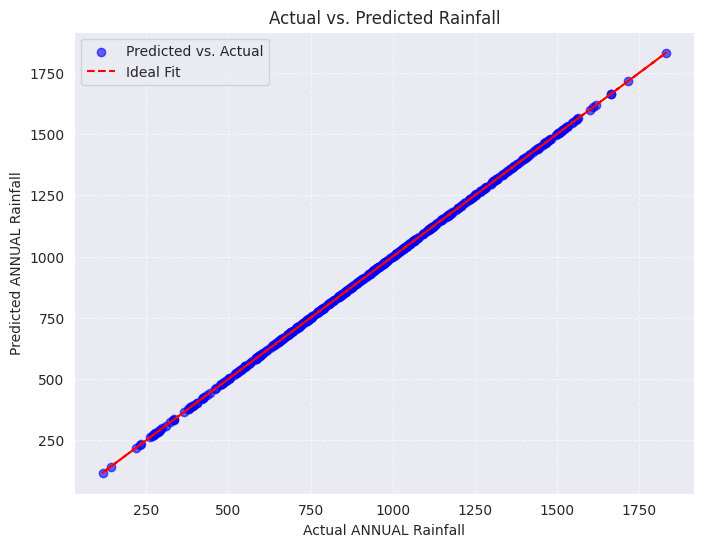

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "cleaned_rainfall_data.csv"  # Adjust if needed
rainfall_df = pd.read_csv(file_path)

# Selecting Independent (X) and Dependent (Y) Variables
X = rainfall_df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]  # Features
y = rainfall_df['ANNUAL']  # Target variable

# Handling missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create & Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 linear regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs. Actual")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")  # Ideal line
plt.xlabel("Actual ANNUAL Rainfall")
plt.ylabel("Predicted ANNUAL Rainfall")
plt.title("Actual vs. Predicted Rainfall")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



📊 RandomForestRegressor Model Performance:
Mean Absolute Error (MAE): 53.48
Mean Squared Error (MSE): 4877.86
R² Score: 0.9551


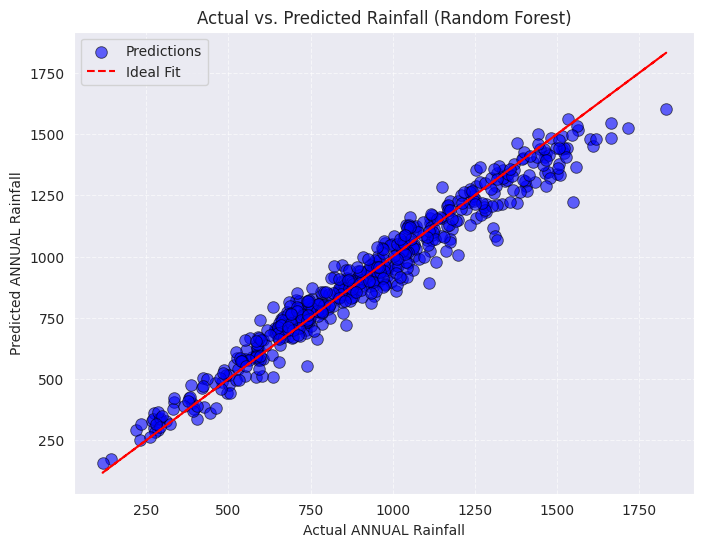

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "cleaned_rainfall_data.csv"  # Adjust if needed
rainfall_df = pd.read_csv(file_path)

# Selecting Independent (X) and Dependent (Y) Variables
X = rainfall_df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].copy()  # Use .copy() to avoid SettingWithCopyWarning
y = rainfall_df['ANNUAL'].copy()

# Handling missing values (if any) - FIXED WARNING
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create & Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 RandomForestRegressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs. Predicted Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, edgecolor="black", s=70, label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")  # Ideal line
plt.xlabel("Actual ANNUAL Rainfall")
plt.ylabel("Predicted ANNUAL Rainfall")
plt.title("Actual vs. Predicted Rainfall (Random Forest)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make a copy of the dataset to avoid modifying the original
df = rainfall_df.copy()

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=["ANNUAL"])  # Features
y = df["ANNUAL"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Performance:
Mean Absolute Error: 1.339375220634918
Mean Squared Error: 6.520620618681269
R² Score: 0.9999400252401694


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make a copy of the dataset to avoid modifying the original
df = rainfall_df.copy()

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=["ANNUAL"])  # Features
y = df["ANNUAL"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Performance:
Mean Absolute Error: 2.6886618072185633
Mean Squared Error: 12.576116068194285
R² Score: 0.9998843285655004



📊 Model Performance (SVM):
Mean Absolute Error (MAE): 20.50
Mean Squared Error (MSE): 2028.74
R² Score: 0.9813


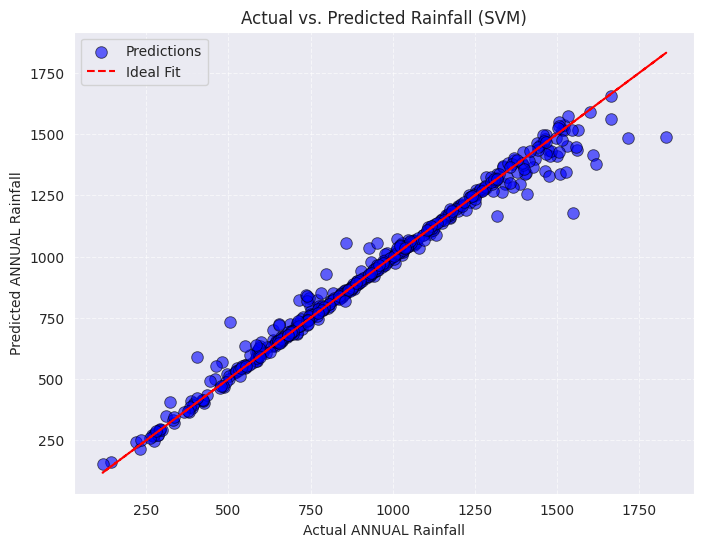

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "cleaned_rainfall_data.csv"  # Adjust if needed
rainfall_df = pd.read_csv(file_path)

# Selecting Independent (X) and Dependent (Y) Variables
X = rainfall_df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].copy()
y = rainfall_df['ANNUAL'].copy()

# Handling missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better SVM performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create & Train SVM Model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)  # RBF kernel for better flexibility
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance (SVM):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs. Predicted Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, edgecolor="black", s=70, label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")  # Ideal line
plt.xlabel("Actual ANNUAL Rainfall")
plt.ylabel("Predicted ANNUAL Rainfall")
plt.title("Actual vs. Predicted Rainfall (SVM)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
